# Анализ собранных данных

В рамках исследования были собраны публикации пользователей из социальной сети ВКонтакте.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

Подготовка данных для анализа:

In [11]:
with open("dataset/data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

users = []
posts = []

for user in data:
    user_id = user["user_id"]
    user_info = {
        "user_id": user_id,
        "sex": user["sex"],
        "city": user["city"],
        "followers_count": user["followers_count"],
        "alcohol": user["alcohol"],
        "smoking": user["smoking"],
        "life_main": user["life_main"],
        "people_main": user["people_main"],
        "status": user["status"],
        "label": user["label"],
    }
    users.append(user_info)
    for post in user["posts"]:
        posts.append({
            "user_id": user_id,
            "text": post["text"],
            "date": post["date"],
            "likes": post["likes"],
            "comments": post["comments"],
            "reposts": post["reposts"],
            "views": post["views"],
            "text_length": len(post["text"]),
            "word_count": len(post["text"].split())
        })

df_users = pd.DataFrame(users)
df_posts = pd.DataFrame(posts)

Итоговый набор включает:

In [13]:
num_users = df_users["user_id"].nunique()
num_posts = len(df_posts)
post_fields = list(df_posts.columns)
user_fields = list(df_users.columns)
label_counts = df_users["label"].value_counts().to_dict()
num_depressive = label_counts.get(1, 0)
num_neutral = label_counts.get(0, 0)

print(f"Количество пользователей: {num_users}")
print(f"Количество постов: {num_posts}")
print(f"Количество депрессивных пользователей: {num_depressive}")
print(f"Количество нейтральных пользователей: {num_neutral}")
print(f"Поля поста: {post_fields}")
print(f"Поля пользователя: {user_fields}")

Количество пользователей: 85914
Количество постов: 206805
Поля поста: ['user_id', 'text', 'date', 'likes', 'comments', 'reposts', 'views', 'text_length', 'word_count']
Поля пользователя: ['user_id', 'sex', 'city', 'followers_count', 'alcohol', 'smoking', 'life_main', 'people_main', 'status', 'label']
Количество депрессивных пользователей: 1327
Количество нейтральных пользователей: 84587


## Визуализация данных

Распределение длины постов по символам:

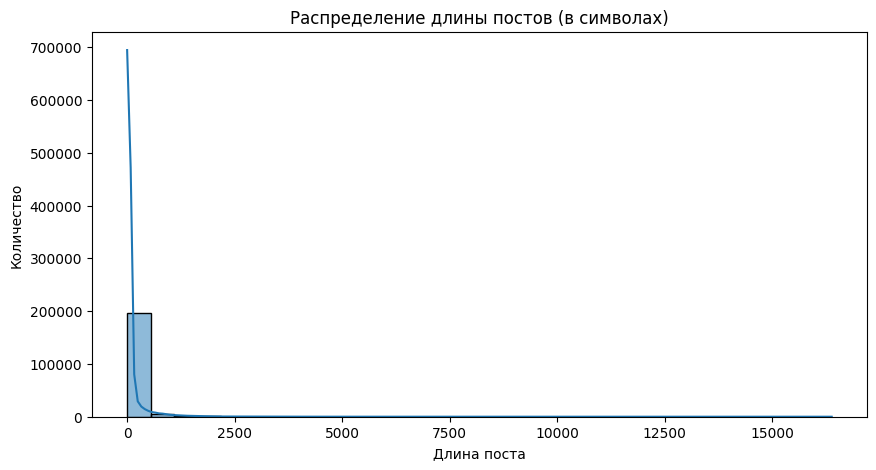

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df_posts["text_length"], bins=30, kde=True)
plt.title("Распределение длины постов (в символах)")
plt.xlabel("Длина поста")
plt.ylabel("Количество")
plt.show()

Распределение количества слов в постах:

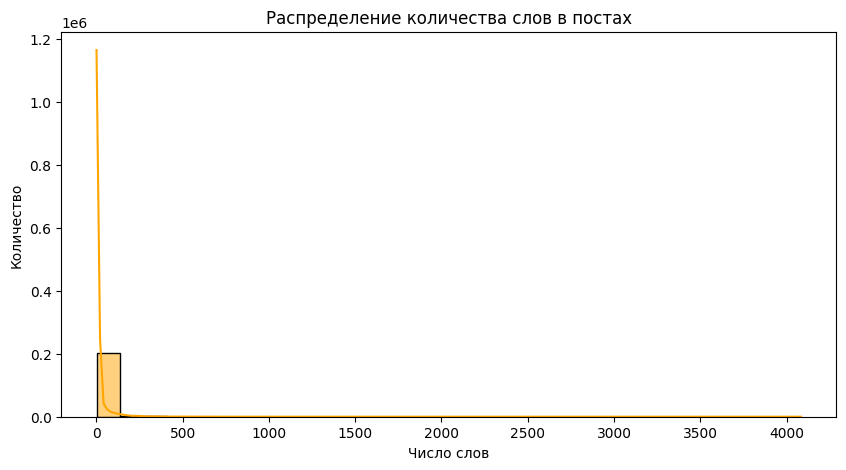

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df_posts["word_count"], bins=30, kde=True, color="orange")
plt.title("Распределение количества слов в постах")
plt.xlabel("Число слов")
plt.ylabel("Количество")
plt.show()

Средняя длина постов:

In [19]:
avg_length = df_posts["text_length"].mean()
avg_words = df_posts["word_count"].mean()
print(f"Средняя длина поста: {avg_length:.2f} символов / {avg_words:.2f} слов")

Средняя длина поста: 119.14 символов / 18.83 слов


Топ-10 городов по числу пользователей:

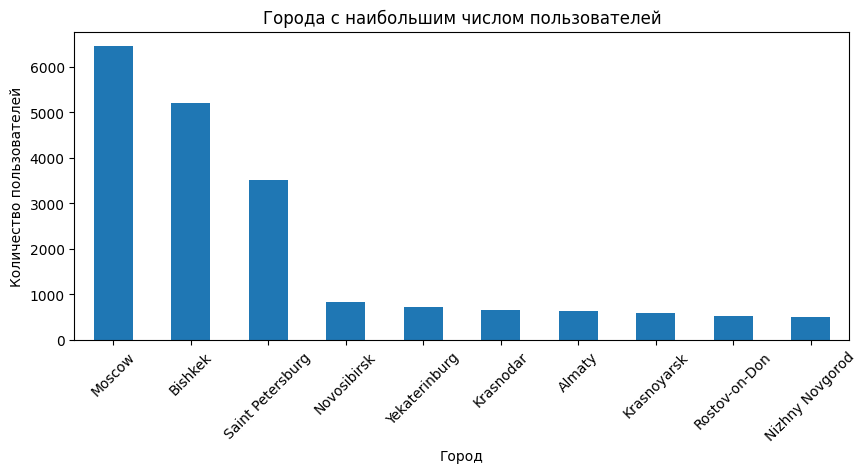

In [20]:
plt.figure(figsize=(10, 4))
df_users["city"].value_counts().head(10).plot(kind="bar")
plt.title("Города с наибольшим числом пользователей")
plt.xlabel("Город")
plt.ylabel("Количество пользователей")
plt.xticks(rotation=45)
plt.show()

Распределение длины постов по классам (label):

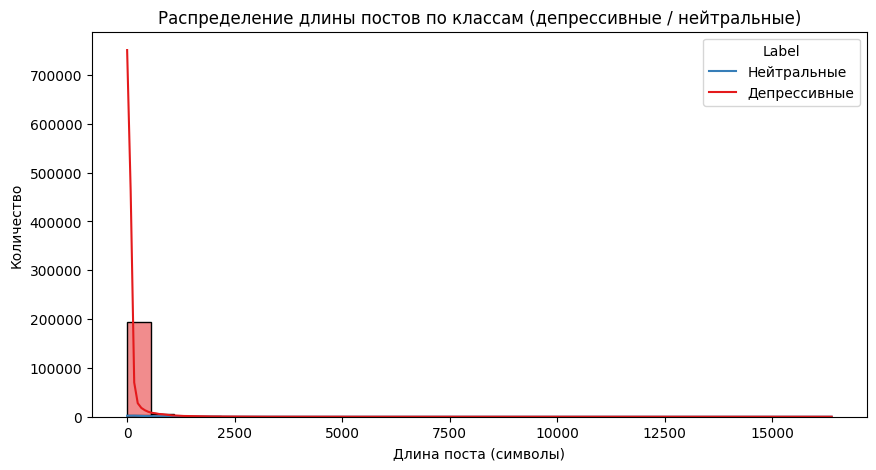

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_posts.merge(df_users[["user_id", "label"]], on="user_id"),
             x="text_length", hue="label", bins=30, kde=True, palette="Set1")
plt.title("Распределение длины постов по классам (депрессивные / нейтральные)")
plt.xlabel("Длина поста (символы)")
plt.ylabel("Количество")
plt.legend(title="Label", labels=["Нейтральные", "Депрессивные"])
plt.show()

Boxplot длины постов по классам:

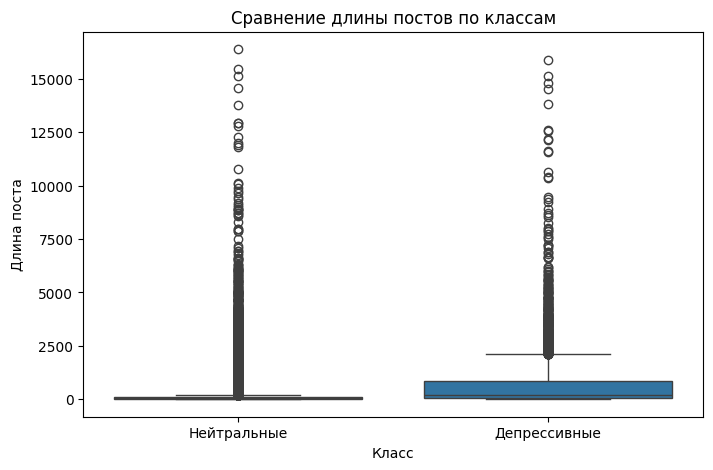

In [22]:
merged = df_posts.merge(df_users[["user_id", "label"]], on="user_id")
plt.figure(figsize=(8, 5))
sns.boxplot(x="label", y="text_length", data=merged)
plt.xticks([0, 1], ["Нейтральные", "Депрессивные"])
plt.title("Сравнение длины постов по классам")
plt.xlabel("Класс")
plt.ylabel("Длина поста")
plt.show()

Среднее число подписчиков в группах:

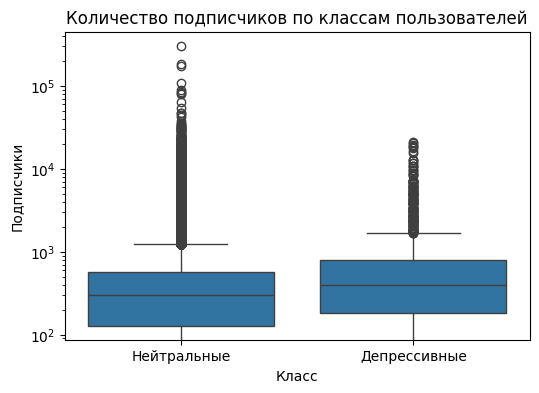

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="label", y="followers_count", data=df_users)
plt.xticks([0, 1], ["Нейтральные", "Депрессивные"])
plt.title("Количество подписчиков по классам пользователей")
plt.xlabel("Класс")
plt.ylabel("Подписчики")
plt.yscale("log")  # логарифм, если есть выбросы
plt.show()